# Data Exploration and EDA


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

color_pal = sns.color_palette('muted')
plt.style.use('tableau-colorblind10')

import re
import contractions
import string
# from textblob import TextBlob

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [22]:
# Read in the data
df_train = pd.read_csv("../data/train.csv")

In [23]:
df_train.tail()


version https://git-lfs.github.com/spec/v1
0  oid sha256:bd4084611bd27c939ba98e5e63bc3e5a2c1...
1                                      size 68802655

In [17]:
df_train.shape


(2, 1)

In [18]:
ax = (
    df_train[df_train.columns[2:].tolist()]
    .value_counts()
    .sort_values(ascending=True)
    .plot(kind="barh", figsize=(10, 10))
)
ax.bar_label(ax.containers[0])

plt.show()

# for _ in df_train.columns[2:].tolist():
#     df_train[_].value_counts().plot(kind='bar')

ValueError: No group keys passed!

In [19]:
# Checking of null values

df_train.isnull().sum()


version https://git-lfs.github.com/spec/v1    0
dtype: int64

In [20]:
# Checking of unique values
display(df_train["id"].nunique())
display(df_train["comment_text"].nunique())

KeyError: 'id'

Total number of rows = 159571
Total number of unique values in id = 159571
Total number of unique values in comment_text = 159571

As the above numbers are the same, each row has a unique id.


In [21]:
with pd.option_context("display.max_colwidth", None):
    display(df_train.tail())

version https://git-lfs.github.com/spec/v1
0  oid sha256:bd4084611bd27c939ba98e5e63bc3e5a2c1a4e99477dcba46c829e4c986c429d
1                                                                size 68802655

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df_train.columns[2:].tolist()


['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
# for c in df_train.columns[2:].tolist():
#     # print(c)
#     df_train.query("@c == 1")['comment_text'].sample(5)


In [ ]:
# Looking at examples for each label

for c in df_train.columns[2:].tolist():
    print(f"{c}")
    with pd.option_context("display.max_colwidth", None):
        display(df_train[df_train[c] == 1][["comment_text"]].sample(5))
    print("-" * 100)

toxic


comment_text
6066    Oh so you find it funny that you're friends with a sicko who grooms young boys on wikipedia? Why do you protect those who use wikipedia as a tool to fufill sick pedophile urges? Do you like to touch up young boys too? It wouldn't suprise me.
150530                                                                                                            Barack Obama is mentally retarted. He is not fit to be president. he is the worst president so far, that we have had in our presidents.
141374                                                                                                                                                                                                  Fuck you all, antisemitic faggots. 128.69.234.194
10525                                                                                                                                                                   weirdo alert. So !BenBen is your real name not DickDick or AdolfAdolf or pedepede
108154                                                                                     Why Isn't Hard Rock Allowd?\nWill it give Dave Grohl some form of AIDS? There's enough sources out there, remove your heads from your arses and face the truth

----------------------------------------------------------------------------------------------------
severe_toxic


comment_text
123268                                                                                                                                                                                                                                                                                                                                                        GO FUCK YOURSELF YOU FUCKIN' SCUM!
58876                                                                                                                                                                                                                                                                                                                                                      ITS STILL FUNNY \nSon of a bitch! _|_
50869                                                                                                                                                                                                                                                                                                           If not, I'm a fucking moron who should fuck off and stop being such an imbecile.
121879  Exactly. noone can fucking tell the differenc ebetween genres here. Trivium is shit metalcore, Bodom Kalmah and Norther are power, Amon Amarth is melodic death NOT viking metal. Fuck wikipedia is full of retards. And to the idiot two paragraphs above, metal is metal? No, you stupid cunt. There are different genres of metal, jsut shut the fuck up. Trivium sucks, eat my dick.
8875                                                                                                                                                                                                                                                                                                                                                              FUCK OFF MY PAGE!!!!!!!!!!!!!!

----------------------------------------------------------------------------------------------------
obscene


comment_text
47631                            Fuck you. I'll just make another account. You're a piece of shit sorry excuse for an administrator.
119684                                                                  GIVE ME HOT ANAL SEX, YOU SEXY IP ADDRESS \n\n212.183.134.66
41933              I did notice the Polka dick of course. Beautiful. Send me any Pat comics you deem worthy, as I love reading them.
120358  What ever idiot who keeps editing football articles with shit on this IP address needs to grow the fuck up, what are you 10?
98153                                              "\n\nWhy in the FVCK would you give a ""love"" sign to a HeadleyDown sockpuppet?"

----------------------------------------------------------------------------------------------------
threat


comment_text
101711  Your creepy fucking head \n\nHello jimmy boy,\n\nI've just started editing this Wikipedia. When I go to other users pages I often find your creepy fucking head appearing from the left side of the screen.\n\nIt's disgusting. I'm an adult and I don't need a note from you.\n\nCould you ask one of your programmers to stop having your creepy fucking head appear on the left side of people's screens? I've asked my brother to kill you if I have to see it again and he said he would.\n\nBest regards,\n\n User Marskell
74248                                                                                                                                                                                                                                                                                                                                                                                                                                                                        I will hunt you down and kill you, you useless piece of shit
13670                                                                                                                                                                                                                                                                                                                                                                                                                                     HOPE YOUR HEAD GETS CUT OFF AND SOMEONE WIPS THERE ASS WITH IT AND THEN STABS YOU IN YOUR HEART
115697                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Nazi Bastard \n\n I will hang your corpse from a tree.
67946                                                                                                                                   =You worthless piece of shit\nAs a concerned citizen I am upset and violated that you would do this.  You are wortheless - how can you take pleasure in hurting Miami this way?  If I ever see you in your life I will make it a point to kill you on site.  You worthless ridiculous bastard I hate your fucking guts I hope you burn in hell and die most painfully.\n\nYours truly,\n\nPP loco

----------------------------------------------------------------------------------------------------
insult


comment_text
127722                             Whoever created this page is either very jelous or very stupid.whole world knows that mevlana was turkish. His Father was turkish ,his mother was turkish, Mevlana himself writes that he is turkish. at that time, the place he was born was a turkish land not persian. All you ignorant wiki racists can cry out loud forever.He was turkish and claiming the opposite in ignorant wiki racist pedia will not change this.oh by the way, our iranian friends also claims that the ottoman empire was actually an iranian  empire.this is  not just very funny but stupid. have a nice day and and stop being stupid please
110363                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Who the fuck is saying ths to me...? How is any of what I put disruptive? If this is person or bot.... go fuck yourself!
121824                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    wow dude... you're a real douche. wow.
132819                                                                                                                                                                                                                                                                                                ALERT: No-talent assclown warning. \n\nBongwarrior, seeing as you spend most if not all your time on wikipedia or masturbating... I was thinking it best to warn you that there is a no-talent assclown roaming wikipedia and ruining peoples fun. Also i will eat your face off during between 1 and 3 A.M. on June 6th 2008. You my friend are pathetic.
17431   Osli73 is an idiot \n\nHe wants to deface Srebrenica massacre article with already discredited Serbian sources. He wanted opinion (moral equivalism) of accused Serb-run rape camp participant - Gen Lewis MacKenzie - to be heard on Srebrenica massacre article. Keep his Srebrenica genocide denials for left-revisionist websites. They are not welcome here. Osli73 also wanted to include Belgrade's already discredited lies about 3000+ Serbs killed to be included in the article (when they were already discussed and discredited). I will not allow Srebrenica massacre article to be poisoned by moral equivalism. Osli73, drop dead loser!

----------------------------------------------------------------------------------------------------
identity_hate


comment_text
40463                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

----------------------------------------------------------------------------------------------------


# EDA


## Target Variables Exploration


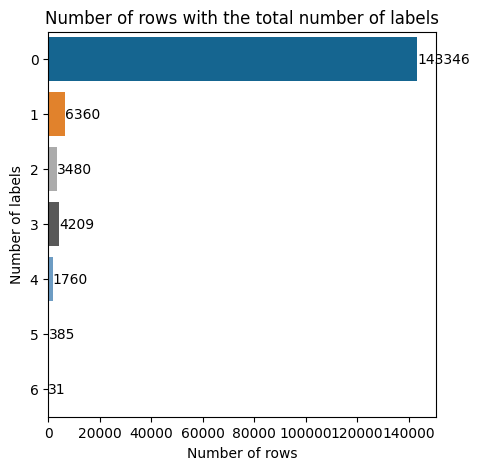

In [ ]:
# Find the number of total counts of of each label for each row
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    data=df_train[df_train.columns[2:].tolist()]
    .sum(axis=1)
    .value_counts(ascending=True)
    .reset_index(),
    x=0,
    y="index",
    orient="h",
)

ax.bar_label(ax.containers[0])

plt.title("Number of rows with the total number of labels")
plt.xlabel("Number of rows")
plt.ylabel("Number of labels")
plt.show()


In [ ]:
# Adding in the non-toxic column for EDA purposes

# Create a copy of the dataframe
df_train_nontoxic = df_train.copy()

# Create a new column called non-toxic for EDA
df_train_nontoxic["non_toxic"] = (
    df_train_nontoxic[df_train.columns[2:].tolist()]
    .sum(axis=1)
    .apply(lambda x: 1 if x > 0 else 0)
)

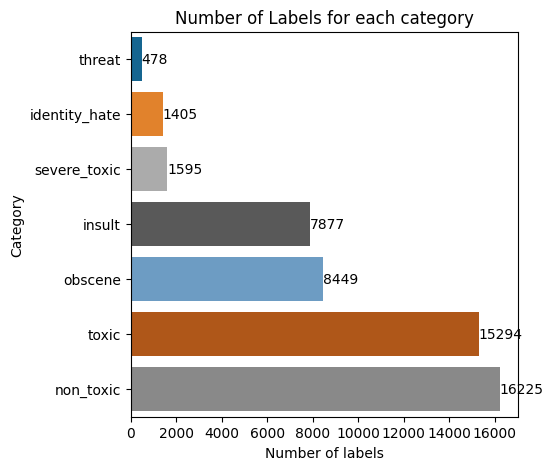

In [ ]:
plt.figure(figsize=(5, 5))

ax = sns.barplot(
    data=df_train_nontoxic[df_train_nontoxic.columns[2:].tolist()]
    .sum()
    .sort_values(ascending=True)
    .reset_index(),
    x=0,
    y="index",
    orient="h",
)

ax.bar_label(ax.containers[0])

plt.title("Number of Labels for each category")
plt.xlabel("Number of labels")
plt.ylabel("Category")
plt.show()

In [ ]:
# Checking for data imbalance

df_train_nontoxic["non_toxic"].value_counts(normalize=True)

0    0.898321
1    0.101679
Name: non_toxic, dtype: float64

- About 10 percent of the data is toxic, the data is imbalanced
- We can also see that most of the toxic data has only one label, with the least having all 6 labels.
- Furthermore, a lot of the toxic data are classified as toxic, with threat being the least.


## Correlation Plot


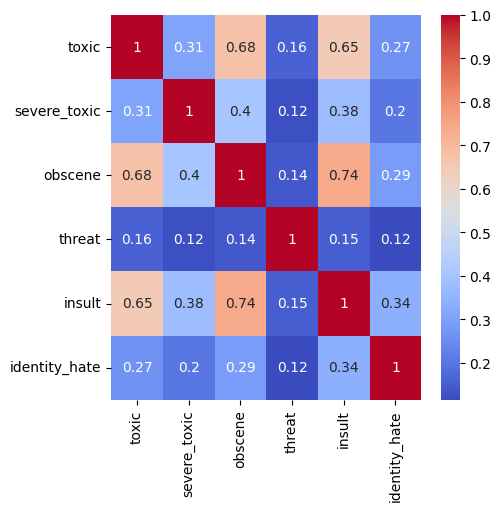

In [ ]:
plt.figure(figsize=(5, 5))

sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")

plt.show()

In [ ]:
# Usage of crosstab to check for correlation between the labels

matrix_all = pd.DataFrame()
for c in df_train.columns[3:]:
    matrix = pd.crosstab(df_train["toxic"], df_train[c])
    display(matrix)

severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595

obscene       0     1
toxic                
0        143754   523
1          7368  7926

threat       0    1
toxic              
0       144248   29
1        14845  449

insult       0     1
toxic               
0       143744   533
1         7950  7344

identity_hate       0     1
toxic                      
0              144174   103
1               13992  1302

What does the above tell me?


In [ ]:
# import scipy.stats as ss
# import itertools

# def cramers_v(confusion_matrix):
#     """ calculate Cramers V statistic for categorial-categorial association.
#         uses correction from Bergsma and Wicher,
#         Journal of the Korean Statistical Society 42 (2013): 323-328
#     """
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [ ]:
# cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
# corrM = np.zeros((len(cols),len(cols)))
# # there's probably a nice pandas way to do this
# for col1, col2 in itertools.combinations(cols, 2):
#     idx1, idx2 = cols.index(col1), cols.index(col2)
#     corrM[idx1, idx2] = cramers_v(pd.crosstab(df_train[col1], df_train[col2]))
#     corrM[idx2, idx1] = corrM[idx1, idx2]


In [ ]:
# corr = pd.DataFrame(corrM, index=cols, columns=cols)
# fig, ax = plt.subplots(figsize=(7, 6))
# ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables")
# plt.show()


In [ ]:
# confusion_matrix = pd.crosstab(df_train['toxic'], df_train['severe_toxic'])

# cramers_v(confusion_matrix)


In [ ]:
# Word clouds

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [ ]:
def show_wordcloud(feature, pic=None):
    """
    Function to create word clouds, and to input pictures
    """

    py_words = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=200,
        mask=pic,
    )

    py_words.generate(
        df_train_nontoxic.loc[df_train_nontoxic[feature] == 1, "comment_text"].str.cat(
            sep=" "
        )
    )

    plt.figure(figsize=(20, 10))
    plt.imshow(py_words, interpolation="bilinear")
    plt.axis("off")

    plt.title(f"Word Cloud for {feature.title()} Comments", fontsize=20)
    # plt.savefig(f"./charts/{feature.title()}_wordcloud.png", bbox_inches="tight", facecolor='w')
    plt.show()

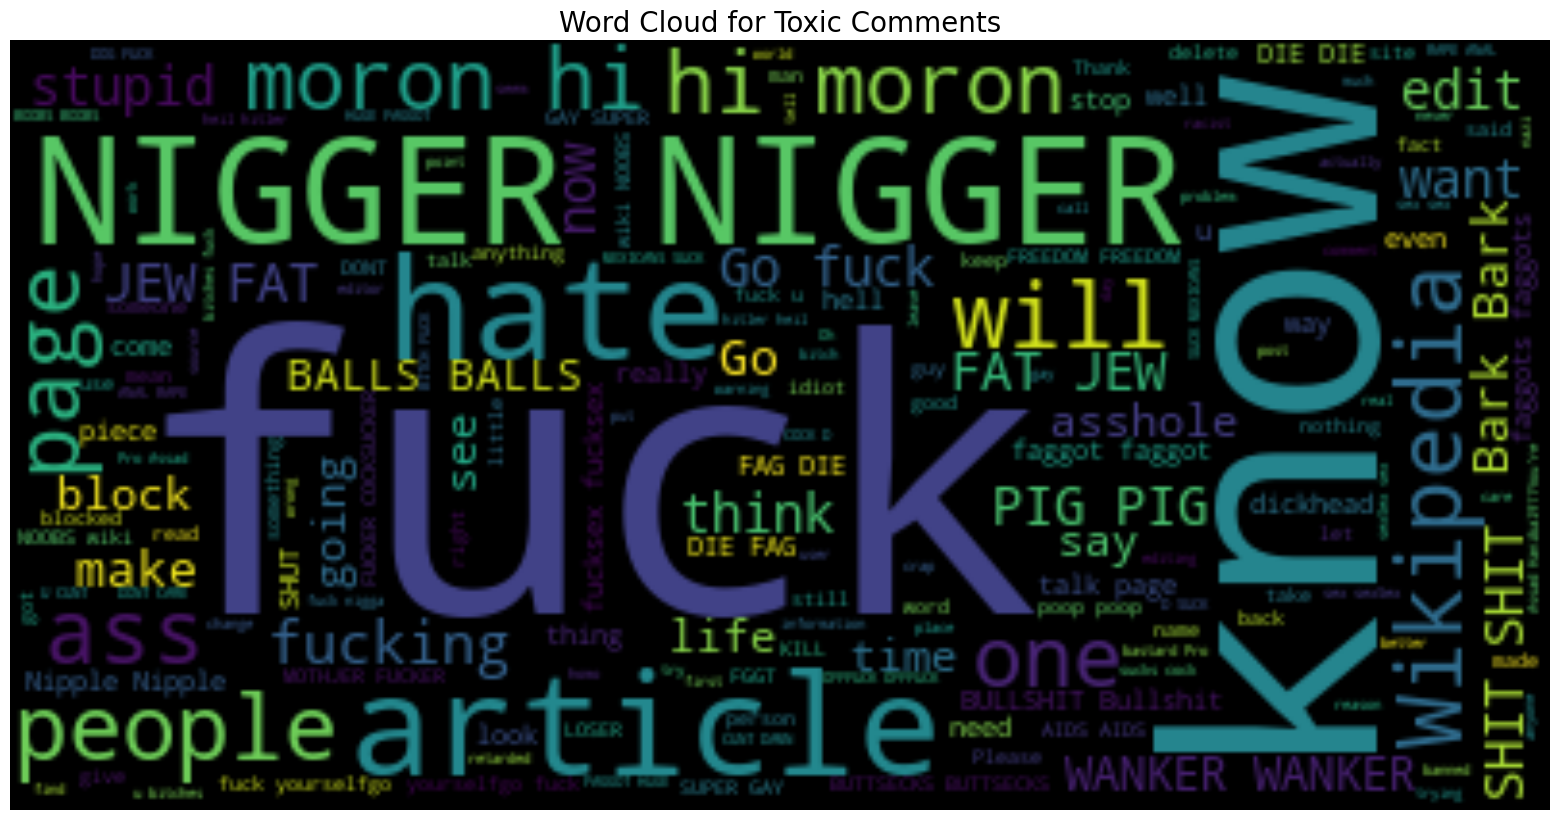

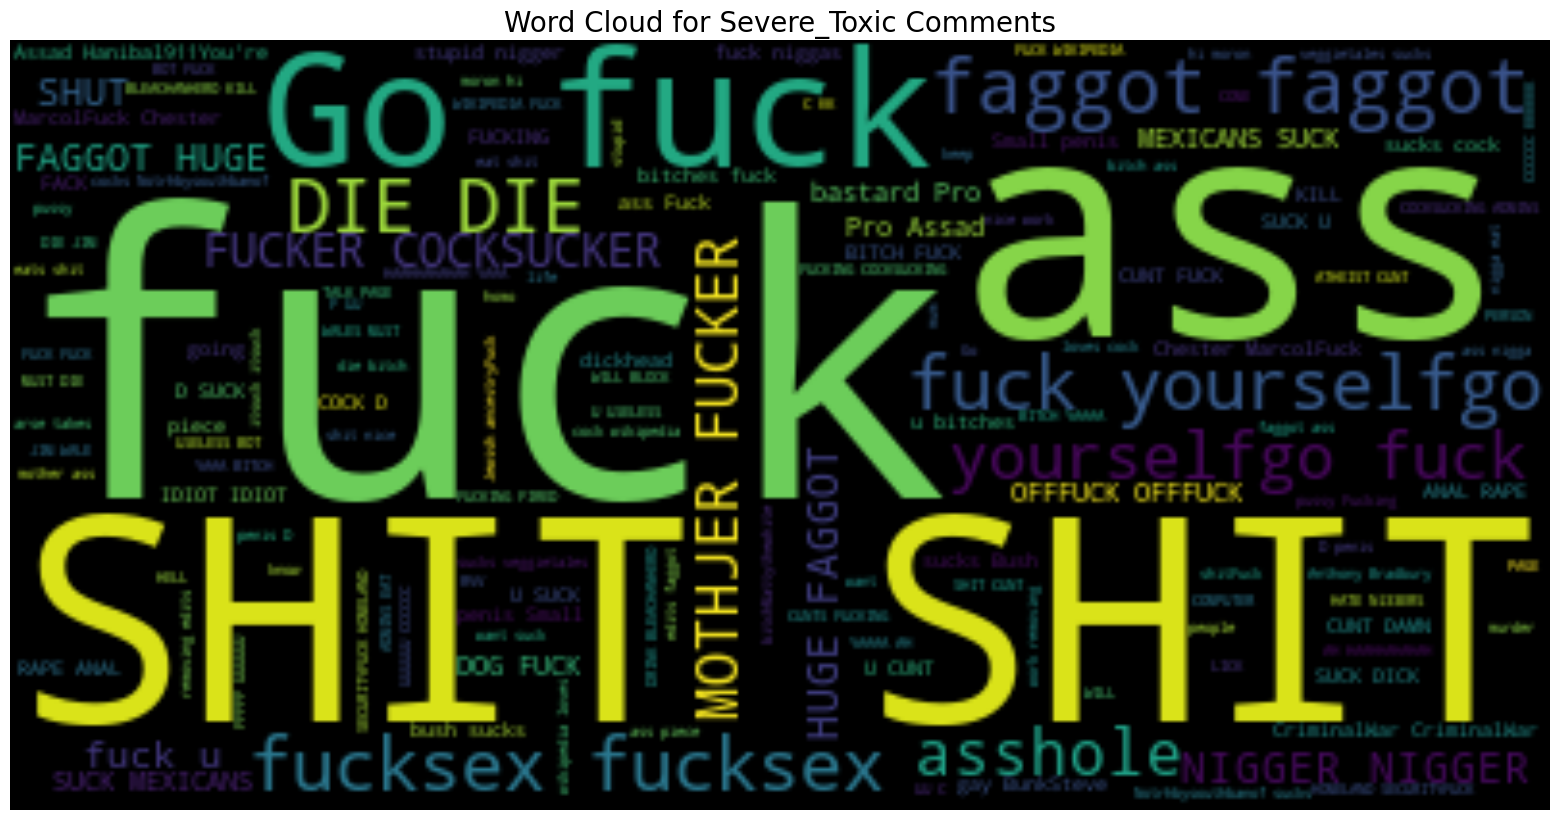

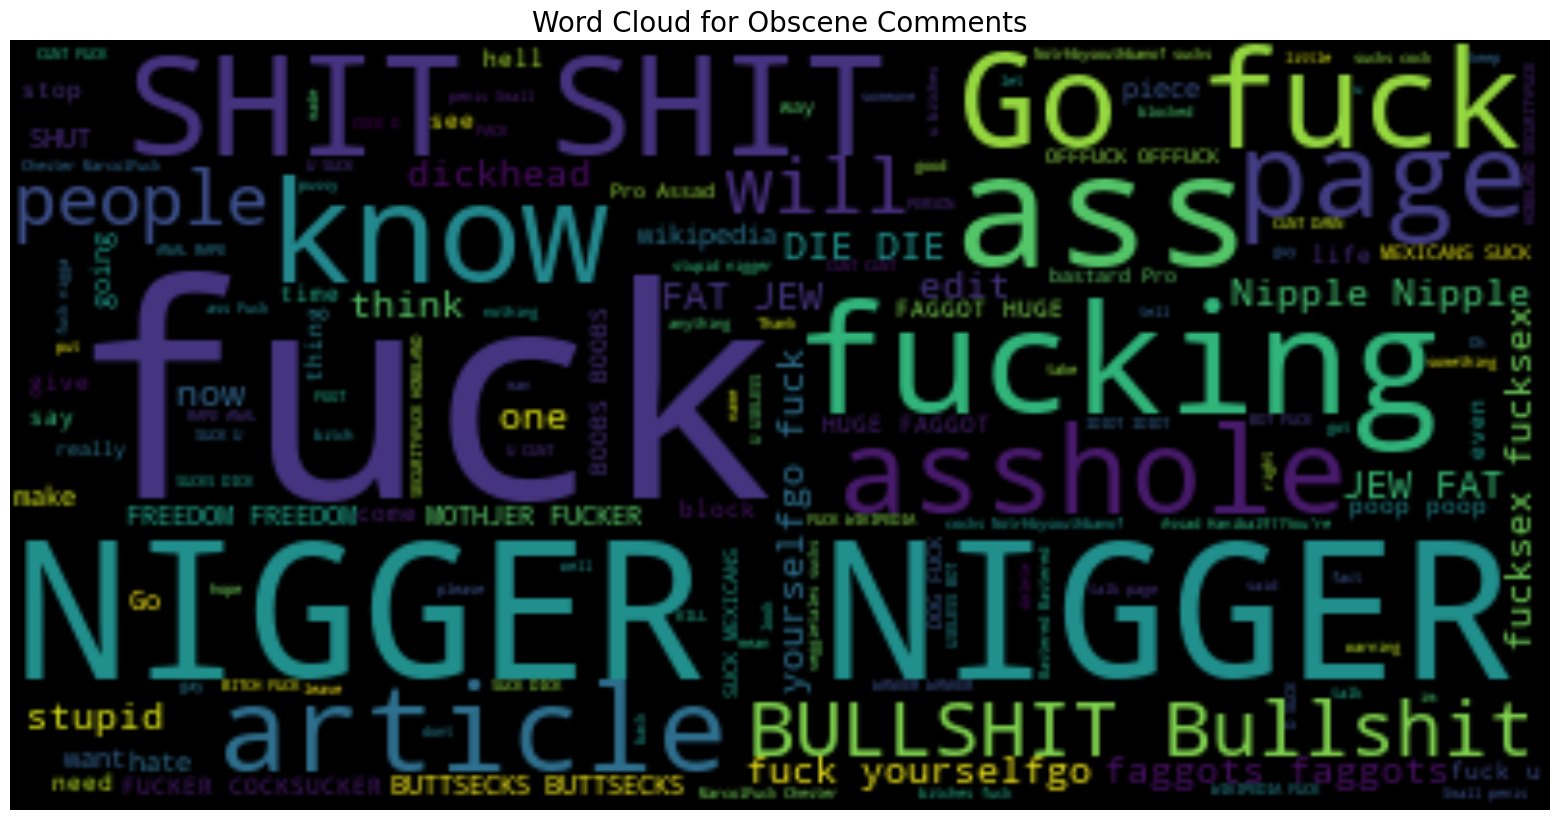

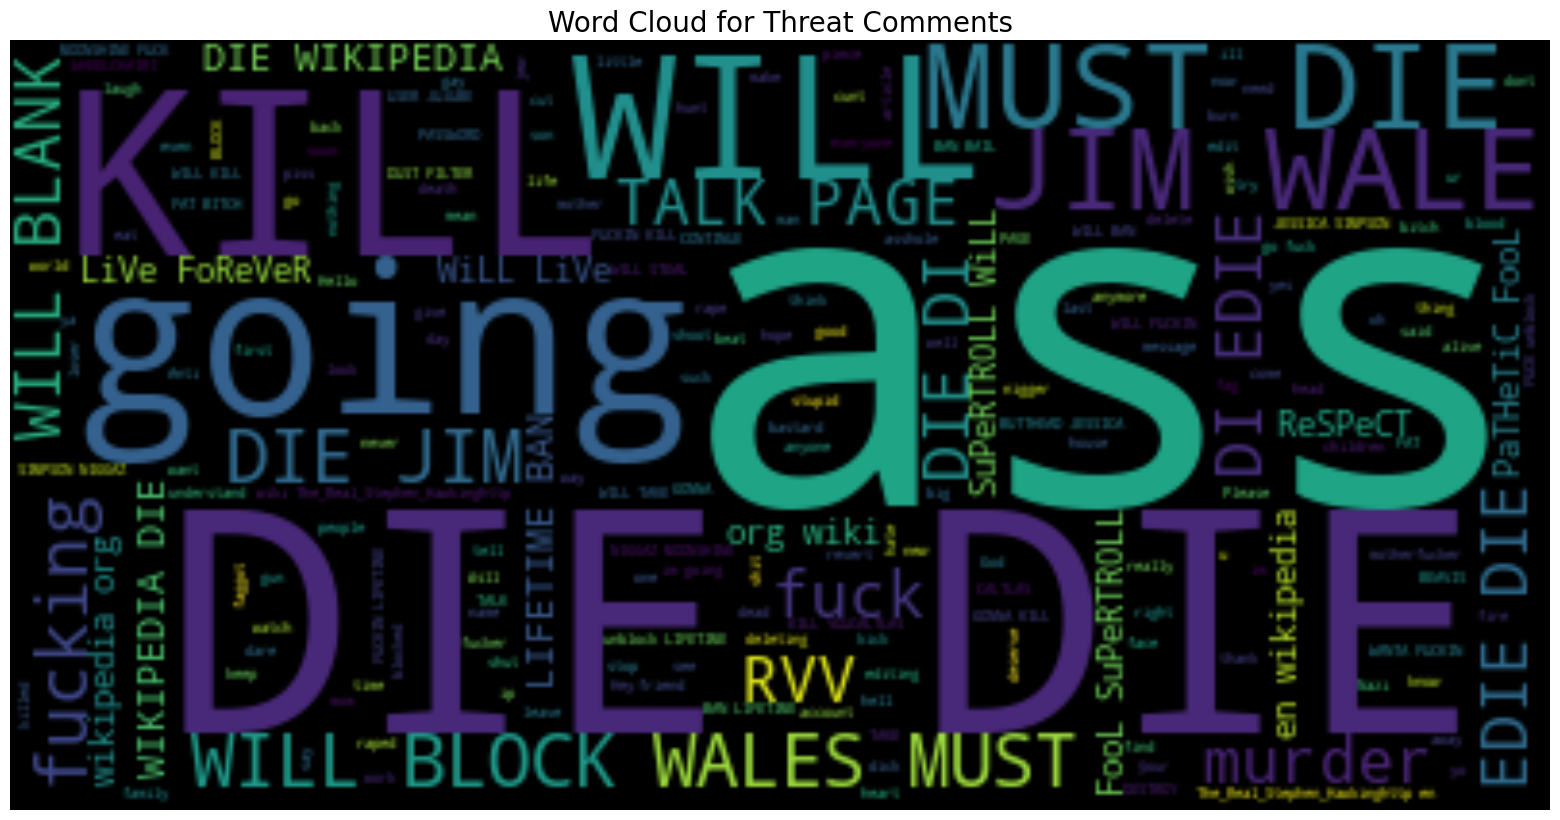

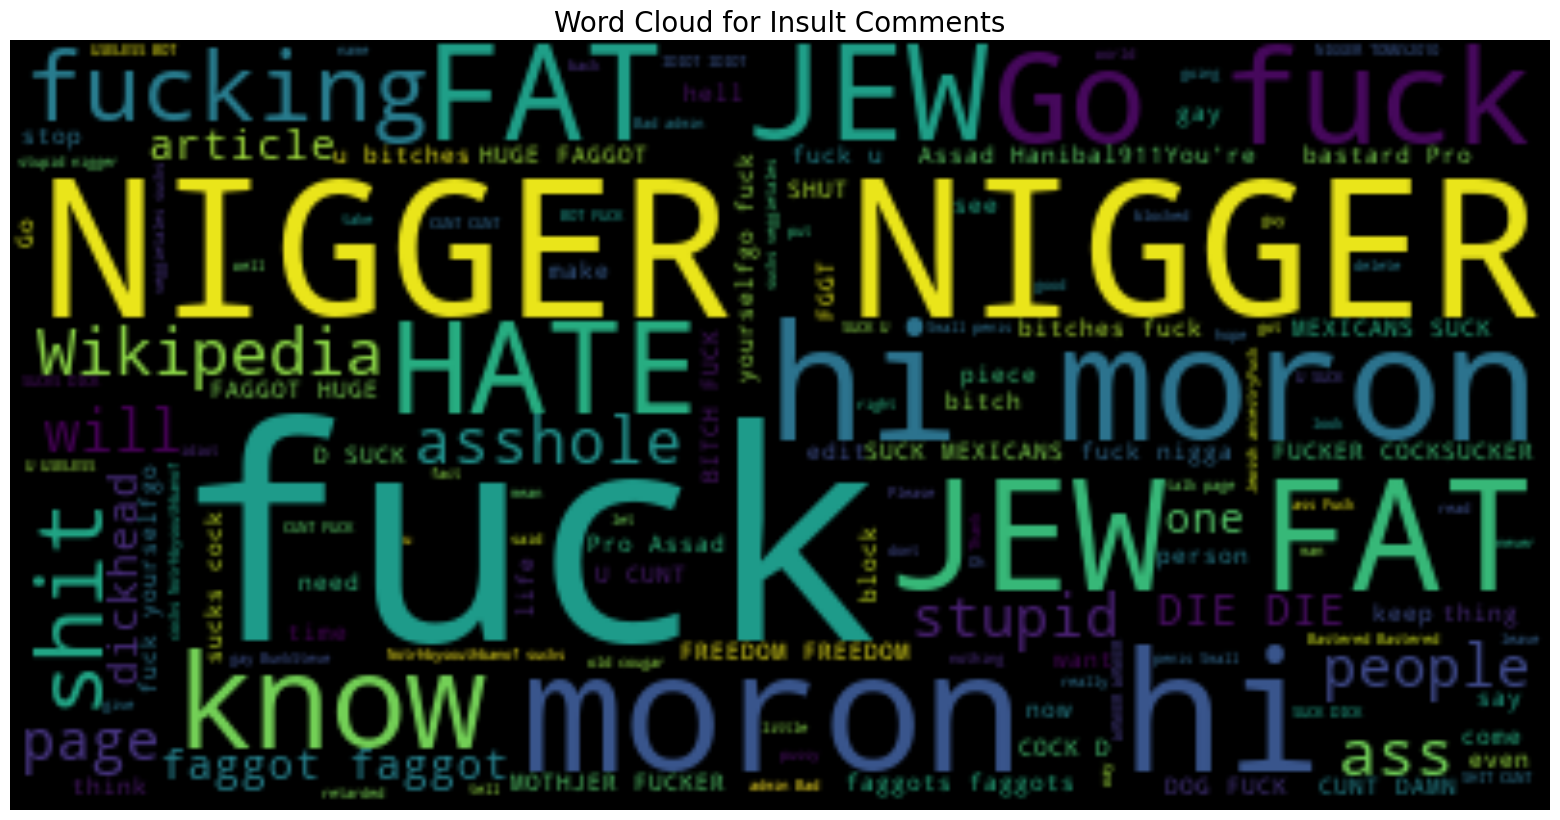

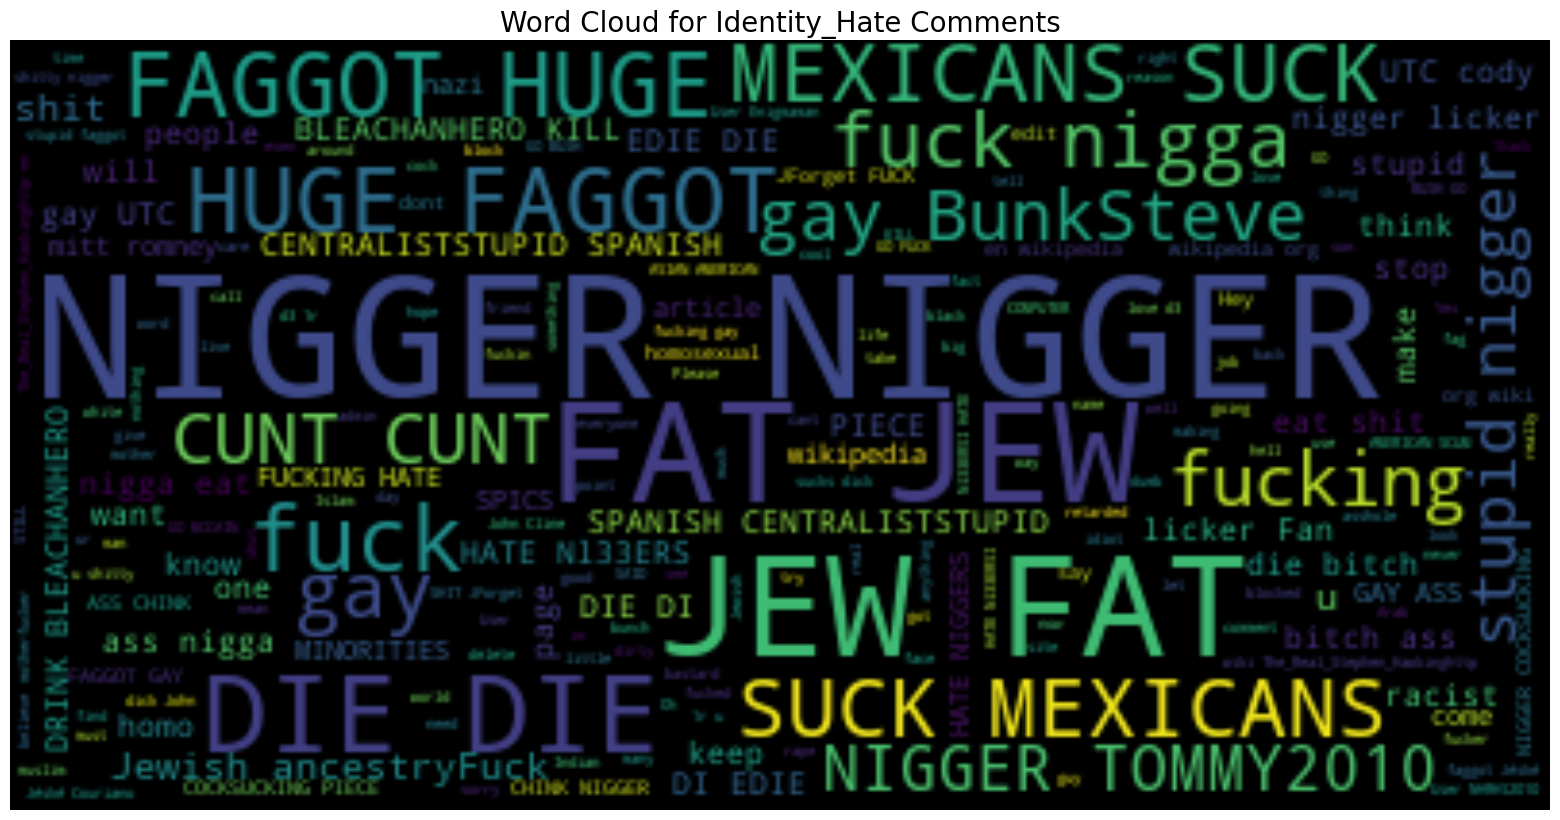

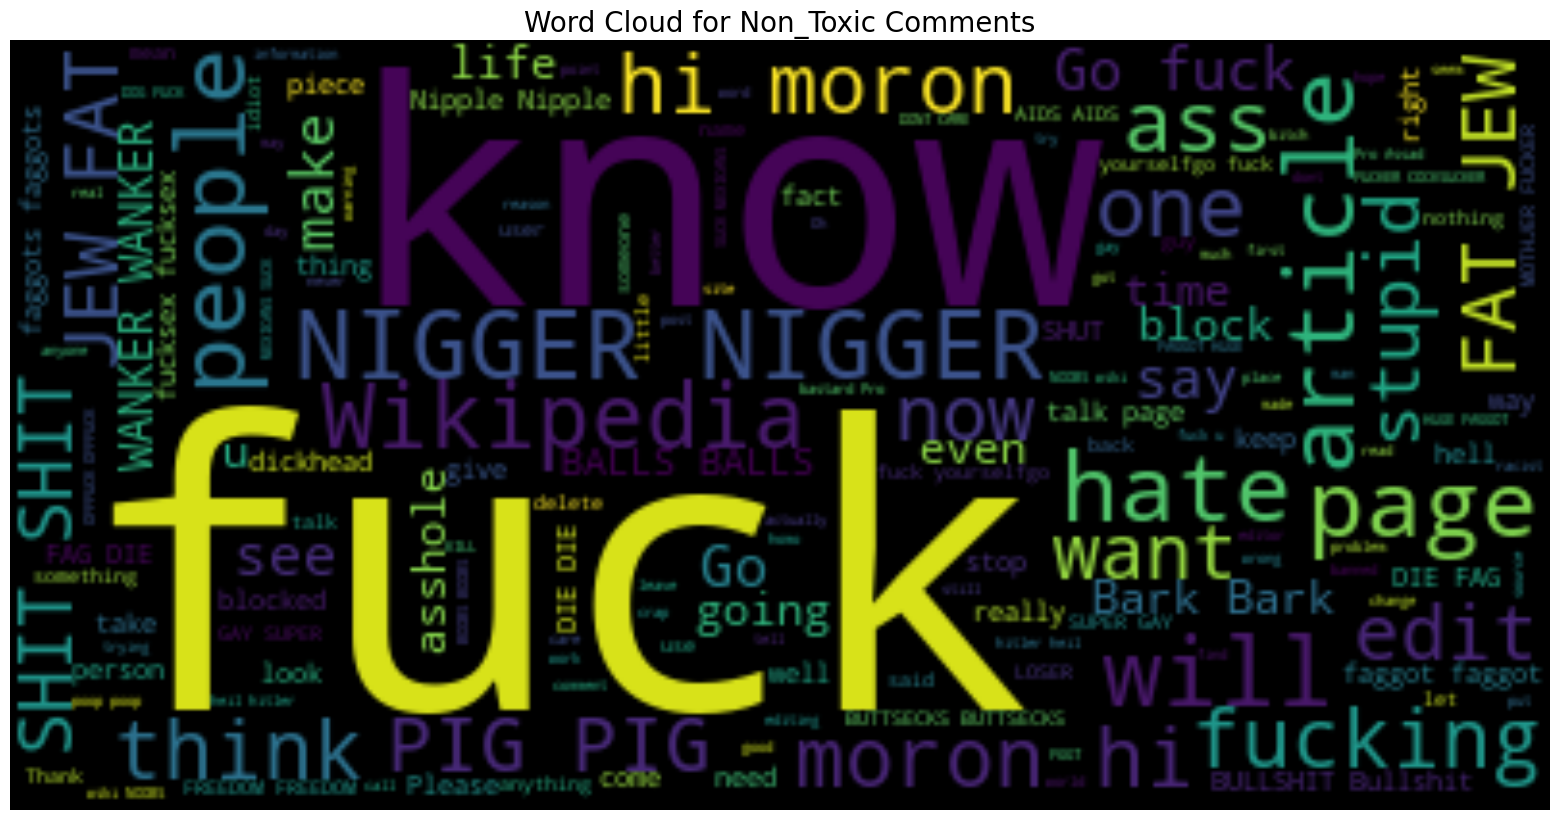

In [ ]:
for c in df_train_nontoxic.columns[2:].tolist():
    show_wordcloud(c)


## Adding of more features for further EDA


In [ ]:
# with pd.option_context('display.max_colwidth',None):
#     display(df_train_nontoxic['comment_text'].str.replace('\d+', '', regex=True))


In [ ]:
# # Number of sentences for each comment
# df_train_nontoxic['sentence_count'] = df_train_nontoxic['comment_text'].str.replace('\d+', '', regex=True).apply(lambda x: len(re.split(r'[.!?\n]+', str(x))))


In [ ]:
# with pd.option_context('display.max_colwidth',None):
#     display(df_train_nontoxic['comment_text'].head())


In [ ]:
# df_train_nontoxic.head()


In [ ]:
# Word count for each comment
df_train_nontoxic["word_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len(str(x).split())
)

# Unique word count for each comment
df_train_nontoxic["unique_word_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len(set(str(x).split()))
)

# Upper case word count for each comment
df_train_nontoxic["upper_case_word_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len([w for w in str(x).split() if w.isupper()])
)

# Stop word count for each comment
df_train_nontoxic["stop_word_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len([w for w in str(x).lower().split() if w in stopwords])
)

# Punctuation count for each comment
df_train_nontoxic["punctuation_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

# Title word count for each comment
df_train_nontoxic["title_word_count"] = df_train_nontoxic["comment_text"].apply(
    lambda x: len([w for w in str(x).split() if w.istitle()])
)

# Number of sentences for each comment
df_train_nontoxic["sentence_count"] = (
    df_train_nontoxic["comment_text"]
    .str.replace("\d+", "", regex=True)
    .apply(lambda x: len(re.split(r"[.!?\n]+", str(x))))
)

# Percent of word count in each comment
df_train_nontoxic["percent_unique_word_count"] = (
    df_train_nontoxic["unique_word_count"] / df_train_nontoxic["word_count"] * 100
)

# Percent of upper case word count in each comment
df_train_nontoxic["percent_upper_case_word_count"] = (
    df_train_nontoxic["upper_case_word_count"] / df_train_nontoxic["word_count"] * 100
)

# Percent of punctuation count in each comment
df_train_nontoxic["percent_punctuation_count"] = (
    df_train_nontoxic["punctuation_count"] / df_train_nontoxic["word_count"] * 100
)


In [ ]:
df_train_nontoxic.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  non_toxic  \
0             0        0       0       0              0          0   
1             0        0       0       0              0          0   
2             0        0       0       0              0          0   
3             0        0       0       0              0          0   
4             0        0       0       0              0          0   

   word_count  unique_word_count  upper_case_word_count  stop_word_count  \
0          43                 41                      2               20   
1          17                 17                      1                3   
2          42                 39                      0               21   
3         113                 82                      5               58   
4          13                 13                      0                6   

   punctuation_count  title_word_count  sentence_count  \
0                 10                11               5   
1                 12                 3               4   
2                  6                 2               4   
3                 21                 7               6   
4                  5                 2               3   

   percent_unique_word_count  percent_upper_case_word_count  \
0                  95.348837                       4.651163   
1                 100.000000                       5.882353   
2                  92.857143                       0.000000   
3                  72.566372                       4.424779   
4                 100.000000                       0.000000   

   percent_punctuation_count  
0                  23.255814  
1                  70.588235  
2                  14.285714  
3                  18.584071  
4                  38.461538

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


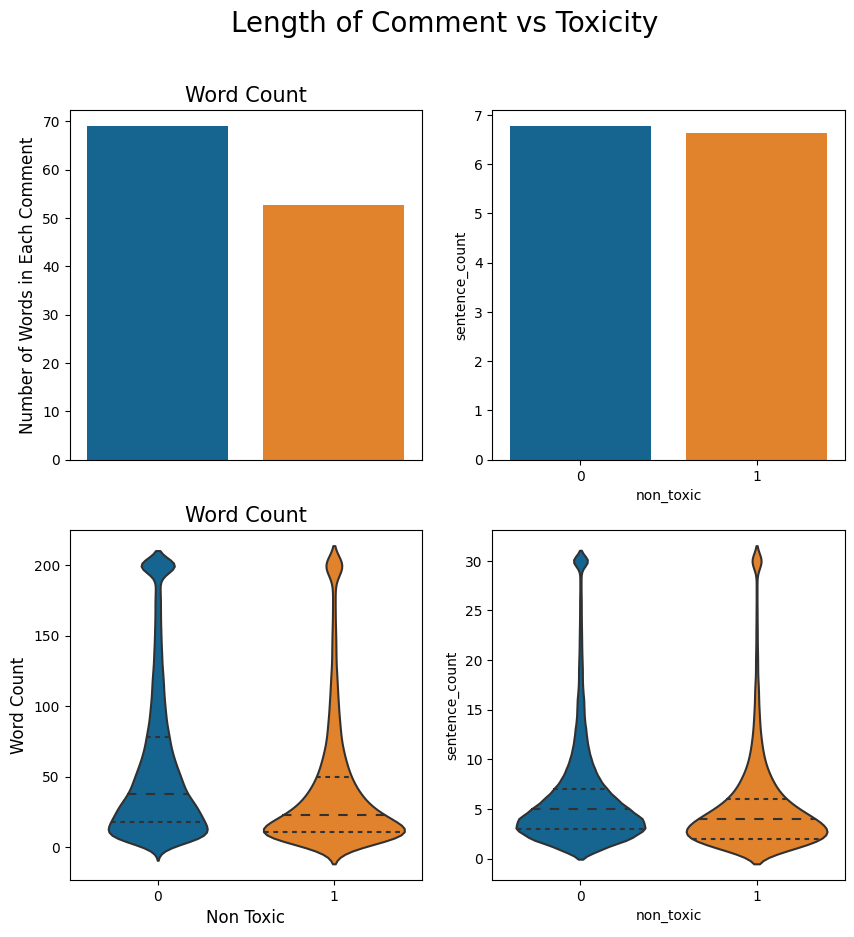

In [ ]:
# Length of comment vs toxicity - Violin plot

# Copy of the dataframe
temp_df = df_train_nontoxic.copy()

# Change the count of words above 200 to be 200
temp_df.loc[temp_df["word_count"] > 200, "word_count"] = 200
temp_df.loc[temp_df["sentence_count"] > 30, "sentence_count"] = 30


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

plt.suptitle("Length of Comment vs Toxicity", fontsize=20)

axes[0, 0] = sns.barplot(
    data=df_train_nontoxic,
    x="non_toxic",
    y="word_count",
    ax=axes[0, 0],
    ci=None,
)
axes[0, 0].set_title("Word Count", fontsize=15)
axes[0, 0].get_xaxis().set_visible(False)
axes[0, 0].set_ylabel("Number of Words in Each Comment", fontsize=12)

axes[1, 0] = sns.violinplot(
    data=temp_df,
    x="non_toxic",
    y="word_count",
    ax=axes[1, 0],
    inner="quartile",
)
axes[1, 0].set_title("Word Count", fontsize=15)
axes[1, 0].set_xlabel("Non Toxic", fontsize=12)
axes[1, 0].set_ylabel("Word Count", fontsize=12)

axes[0, 1] = sns.barplot(
    data=df_train_nontoxic, x="non_toxic", y="sentence_count", ax=axes[0, 1], ci=None
)

axes[1, 1] = sns.violinplot(
    data=temp_df,
    x="non_toxic",
    y="sentence_count",
    ax=axes[1, 1],
    inner="quartile",
)

plt.show()


In [ ]:
# plt.figure(figsize=(5,5))

# sns.displot(data=df_train_nontoxic, x='word_count', hue='non_toxic', kind='kde')

# sns.displot(data=df_train_nontoxic, x='sentence_count', hue='non_toxic', kind='kde')

# plt.show()

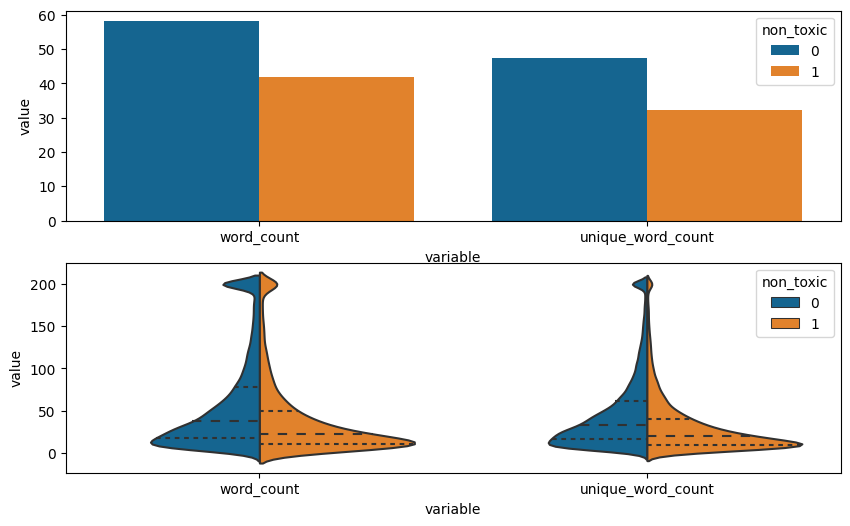

In [ ]:
# Unique word count vs word count - violin plot
temp_df = df_train_nontoxic.copy()
temp_df.loc[temp_df["unique_word_count"] > 200, "unique_word_count"] = 200
temp_df.loc[temp_df["word_count"] > 200, "word_count"] = 200

temp_df = pd.melt(
    temp_df, value_vars=["word_count", "unique_word_count"], id_vars="non_toxic"
)
# display(temp_df.head())

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

axes[0] = sns.barplot(
    data=temp_df, x="variable", y="value", hue="non_toxic", ax=axes[0], ci=None
)

axes[1] = sns.violinplot(
    data=temp_df,
    x="variable",
    y="value",
    hue="non_toxic",
    split=True,
    inner="quartile",
    ax=axes[1],
)

plt.show()


<Figure size 500x500 with 0 Axes>

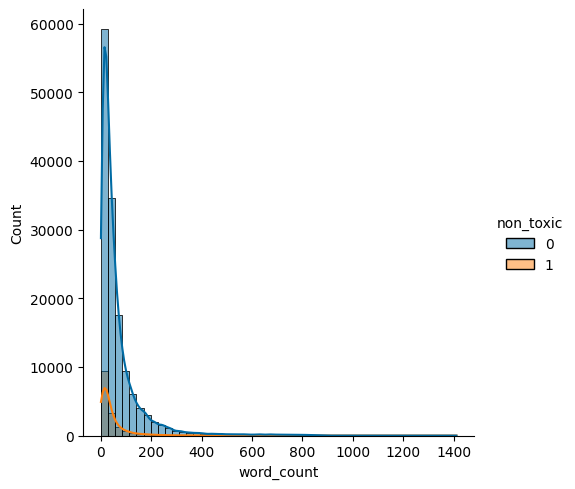

In [ ]:
# Length of comment vs toxicity - distribution plot

# Copy of the dataframe
df_1 = df_train_nontoxic.copy()

# Change the count of words above 200 to be 200
# df_1.loc[df_1['word_count'] > 200, 'word_count'] = 200
# df_1.loc[df_1['sentence_count'] > 30, 'sentence_count'] = 30

# fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 6))
fig = plt.figure(figsize=(5, 5))

sns.displot(
    data=df_1,
    x="word_count",
    hue="non_toxic",
    kde=True,
    bins=50,
    color=color_pal,
)
# axes[0] = sns.histplot(
#     data=df_1,
#     x="non_toxic",
#     y="sentence_count",
#     ax=axes[0]
# )

# axes[1] = sns.histplot(
#     data=df_1,
#     x="non_toxic",
#     y="word_count",
#     ax=axes[1]
# )

plt.show()


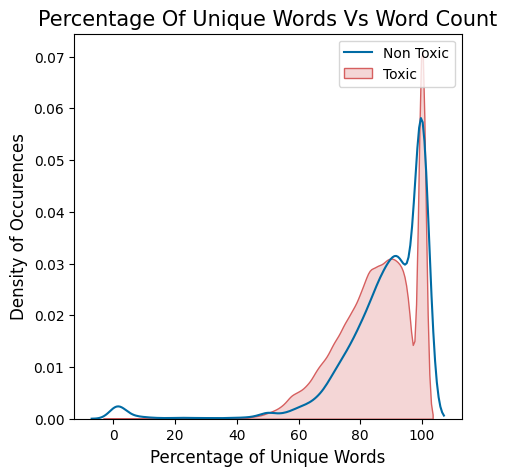

In [ ]:
# Percentage of unique words vs word count
# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(
    data=df_train_nontoxic.query("non_toxic == 1"),
    x="percent_unique_word_count",
    ax=ax,
    label="Non Toxic",
    # color=color_pal[0]
)

sns.kdeplot(
    data=df_train_nontoxic.query("non_toxic == 0"),
    x="percent_unique_word_count",
    shade=True,
    label="Toxic",
    color=color_pal[3],
    ax=ax,
)

ax.legend()
plt.title("Percentage of Unique Words vs Word Count".title(), fontsize=15)
plt.xlabel("Percentage of Unique Words", fontsize=12)
plt.ylabel("Density of Occurences", fontsize=12)
plt.show()

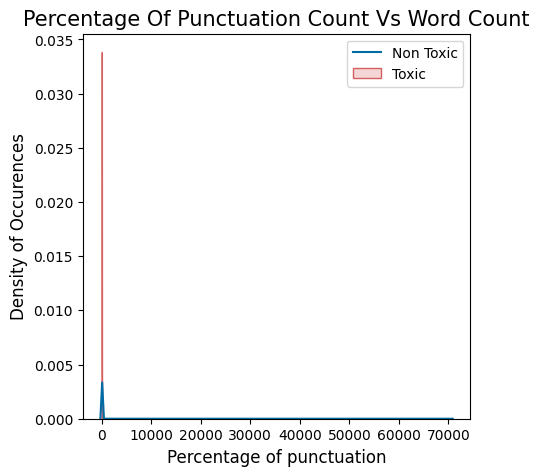

In [ ]:
# Percentage of punctuation vs word count
# plt.figure(figsize=(5,5))
fig, ax = plt.subplots(figsize=(5, 5))

sns.kdeplot(
    data=df_train_nontoxic.query("non_toxic == 1"),
    x="percent_punctuation_count",
    ax=ax,
    label="Non Toxic",
    # color=color_pal[0]
)

sns.kdeplot(
    data=df_train_nontoxic.query("non_toxic == 0"),
    x="percent_punctuation_count",
    shade=True,
    label="Toxic",
    color=color_pal[3],
    ax=ax,
)

ax.legend()
plt.title("Percentage of punctuation count vs Word Count".title(), fontsize=15)
plt.xlabel("Percentage of punctuation", fontsize=12)
plt.ylabel("Density of Occurences", fontsize=12)
plt.show()

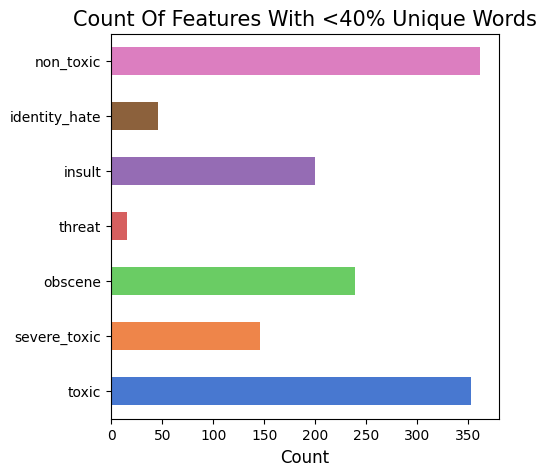

In [ ]:
# Plot of unique words for each feature

plt.figure(figsize=(5, 5))
(
    df_train_nontoxic.query("percent_unique_word_count < 40")
    .sum(axis=0)[
        [
            "toxic",
            "severe_toxic",
            "obscene",
            "threat",
            "insult",
            "identity_hate",
            "non_toxic",
        ]
    ]
    .plot(kind="barh", color=color_pal)
)

plt.title("count of features with <40% unique words".title(), fontsize=15)
plt.xlabel("count".title(), fontsize=12)

plt.show()


- From the chart above, it can be determined that there are alot of spammers for toxic words.
- Non toxic comments tend to have more than 40% unique words


In [ ]:
# Looking into some toxic comments
with pd.option_context("display.max_colwidth", None):
    display(
        df_train_nontoxic.query("toxic == 1 and percent_unique_word_count < 40")
        .comment_text.sample(2)
        .reset_index()
    )


index  \
0   82277   
1  114786   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  
0  Your mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\n\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\n\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big fat whore.\nYour mum is a big f

In [ ]:
# Looking into some non_toxic comments
with pd.option_context("display.max_colwidth", None):
    display(
        df_train_nontoxic.query("non_toxic == 1 and percent_unique_word_count < 40")
        .comment_text.sample(2)
        .reset_index()
    )


index  \
0  68101   
1  70031   

                                                                                                                                                                                                                                                                                                                                                                                                                                               comment_text  
0                                                                                                                                                                                                                                    Amadeus!\nsings that Amadeus song* I'm a jackass, I'm a jackass, I'm a jackass. I'm a jackass, I'm a jackass, I'm a jackass. I'm a jackass, I'm a jackass, I'm a jackass. Oh oh oh oh, I'm a jackass =D 69.156.179.180  
1  WORST MOVIE EVER \n\nFROZEN SUCKS\nFROZEN SUCKSFROZEN SUCKSFROZEN SUCKS\nFROZEN SUCKS\nFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKS\nFROZEN SUCKS\nFROZEN SUCKSFROZEN SUCKS\nFROZEN SUCKS\nFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSVVV\nV\nVV\nFROZEN SUCKS\nVVVFROZEN SUCKSFROZEN SUCKSVFROZEN SUCKS\nFROZEN SUCKSVFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKSFROZEN SUCKS

# Data Cleaning


Before we can look into the comment_text column, the data needs to be cleaned.

1. Change words to lower case
2. Remove contractions
3. Remove punctuation
4. Remove numbers
5. Remove special characters
6. Remove HTML tags
7. Remove URL


Change of words to lower case, and remove contractions


In [ ]:
# # Number of words

# # Create a copy of the dataframe
# df_train_copy = df_train.copy()

# # Lower case all the words & clean up the contractions
# df_train_copy["cleaned_comment_text"] = (
#     df_train_copy["comment_text"]
#     .apply(lambda x: x.lower())
#     .apply(lambda x: contractions.fix(x))
# )

# # Clean up the contractions
# # df_train_copy['cleaned_comment_text'] = df_train_copy['comment_text'].apply(lambda x: contractions.fix(x))


Removal of punctuations


In [ ]:
def remove_punct(text):
    """
    Remove punctuations from text
    """
    return re.sub(r"[^A-Za-z0-9]", " ", text)


In [ ]:
# remove_punct('Wikipedia:Good_article_nominations#Transport')


Removal of numbers


In [ ]:
def remove_numbers(text):
    """
    Remove numbers from text
    """
    return re.sub(r"\d+", "", text)


Removal of special characters


In [ ]:
def remove_special_character(text):
    """
    Remove special characters from text, including symbols, emojis and other graphic characers
    """
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)

In [ ]:
remove_special_character("Hello, :world! 😊")


'Hello, :world! '

Removal of HTML tags


In [ ]:
def remove_html(text):
    """
    Remove HTML tags from a string
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)


Removal of URL


In [ ]:
def remove_url(text):
    """
    Remove URLs from a string
    """
    url = re.compile(r"https?://\S+|www\.\S+")
    return re.sub(url, "", text)


Spelling Correction


In [ ]:
# df_train_copy['cleaned_comment_text'] = df_train_copy['cleaned_comment_text'].apply(lambda x: TextBlob(x).correct())


In [ ]:
# Combine cleaning

def clean(text):
    text = text.lower()
    text = contractions.fix(text)
    text = remove_url(text)
    text = remove_html(text)
    text = remove_special_character(text)
    text = remove_punct(text)
    text = remove_numbers(text)
    # text = TextBlob(text).correct()
    lemma = WordNetLemmatizer()
    text = ' '.join(lemma.lemmatize(word,pos="v") for word in text.split())
    text = ' '.join(w for w in text.split() if len(w) > 2)
    return text

In [ ]:
df_train_copy = df_train.copy()


In [ ]:
# with pd.option_context('display.max_colwidth', None):
#     display(df_train_copy['comment_text'])


In [ ]:
df_train_copy["cleaned_comment_text"] = df_train_copy["comment_text"].apply(
    lambda x: clean(x)
)

# Clean the dataframe with the non toxic feature
df_train_nontoxic["cleaned_comment_text"] = df_train_nontoxic["comment_text"].apply(
    lambda x: clean(x)
)


In [ ]:
with pd.option_context("display.max_colwidth", None):
    display(df_train_copy.head())

id  \
0  0000997932d777bf   
1  000103f0d9cfb60f   
2  000113f07ec002fd   
3  0001b41b1c6bb37e   
4  0001d958c54c6e35   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         comment_text  \
0                                                                                                                                                                                                                                                                                                                                                                           Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)   
2                                                                                                                                                                                                                                                                                                                                                                                                           Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.   
3  "\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 You, sir, are my hero. Any chance you remember what page that's on?   

   toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0      0     

# What are the most common words in the comment_text?


Unigrams


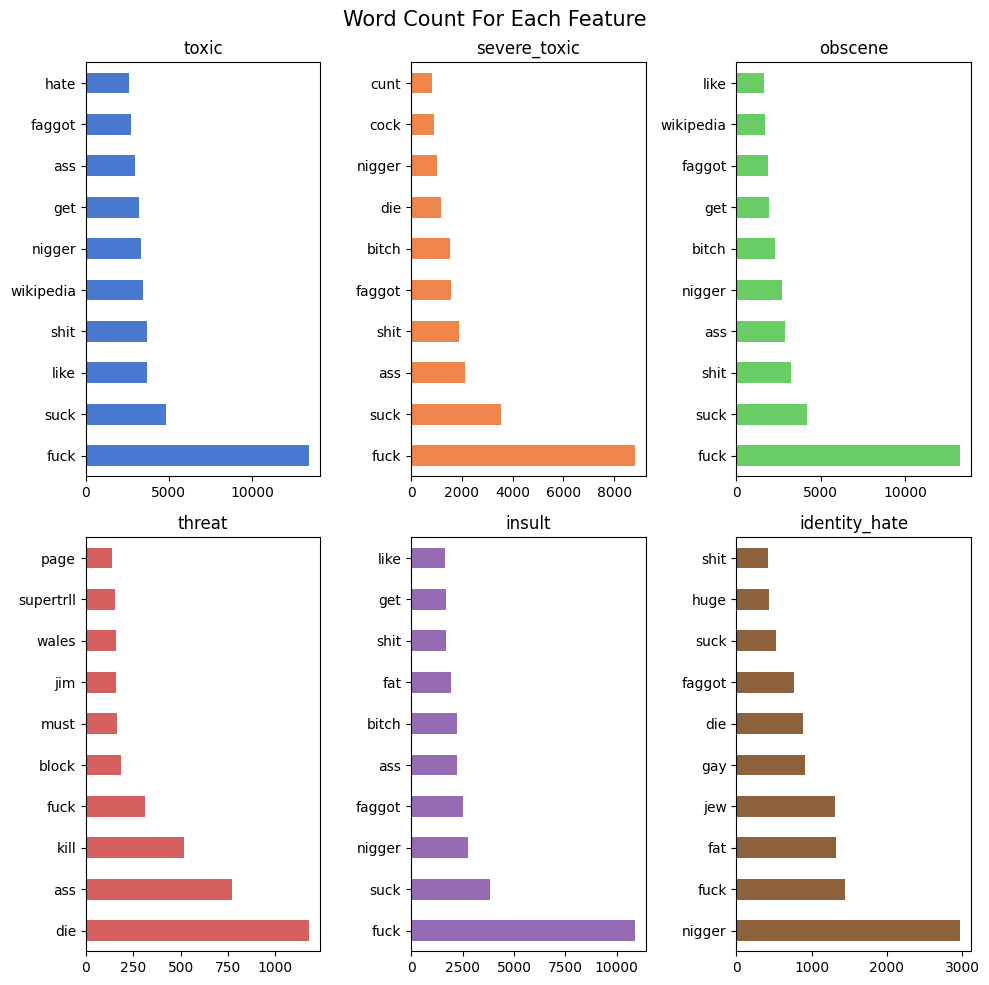

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
plt.suptitle("word count for each feature".title(), fontsize=15)

# To create a for-loop
for count, colax in enumerate(zip(df_train.columns[2:8], axes.flat)):
    cus = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), max_features=10000)
    cus.fit(df_train_copy.loc[df_train_copy[colax[0]] == 1, "cleaned_comment_text"])

    temp_df = pd.DataFrame(
        cus.transform(
            df_train_copy.loc[df_train_copy[colax[0]] == 1, "cleaned_comment_text"]
        ).todense(),
        columns=cus.get_feature_names_out(),
    )

    temp_df.sum().sort_values(ascending=False).head(10).plot(
        kind="barh", ax=colax[1], color=color_pal[count]
    )
    colax[1].set_title(colax[0])

plt.tight_layout()
plt.show()

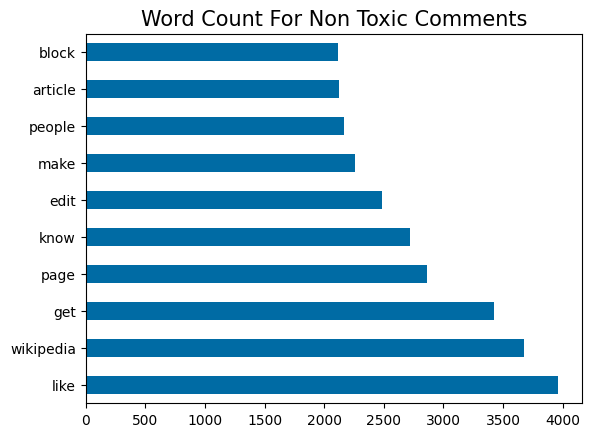

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

cus = CountVectorizer(
    stop_words=stop_words, ngram_range=(1, 1), max_features=10000, min_df=0.01
)
cus.fit(
    df_train_nontoxic.loc[df_train_nontoxic["non_toxic"] == 0, "cleaned_comment_text"]
)

temp_df = pd.DataFrame(
    cus.transform(
        df_train_nontoxic.loc[
            df_train_nontoxic["non_toxic"] == 1, "cleaned_comment_text"
        ]
    ).todense(),
    columns=cus.get_feature_names_out(),
)

temp_df.sum().sort_values(ascending=False).head(10).plot(kind="barh")

plt.title("word count for non toxic comments".title(), fontsize=15)
plt.show()

Bigrams


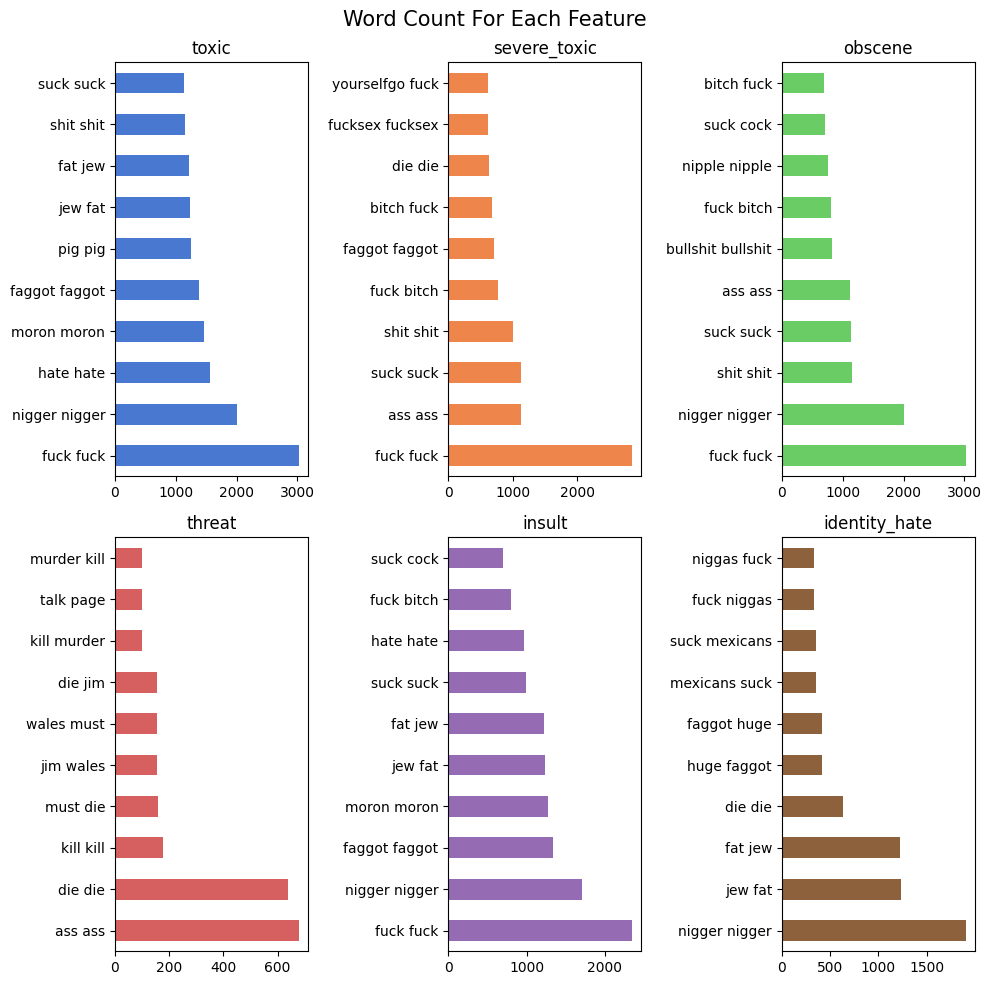

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
plt.suptitle("word count for each feature".title(), fontsize=15)

# To create a for-loop
for count, colax in enumerate(zip(df_train.columns[2:8], axes.flat)):
    cus = CountVectorizer(stop_words=stop_words, ngram_range=(2, 2), max_features=10000)
    cus.fit(df_train_copy.loc[df_train_copy[colax[0]] == 1, "cleaned_comment_text"])

    temp_df = pd.DataFrame(
        cus.transform(
            df_train_copy.loc[df_train_copy[colax[0]] == 1, "cleaned_comment_text"]
        ).todense(),
        columns=cus.get_feature_names_out(),
    )

    temp_df.sum().sort_values(ascending=False).head(10).plot(
        kind="barh", ax=colax[1], color=color_pal[count]
    )
    colax[1].set_title(colax[0])

plt.tight_layout()
plt.show()

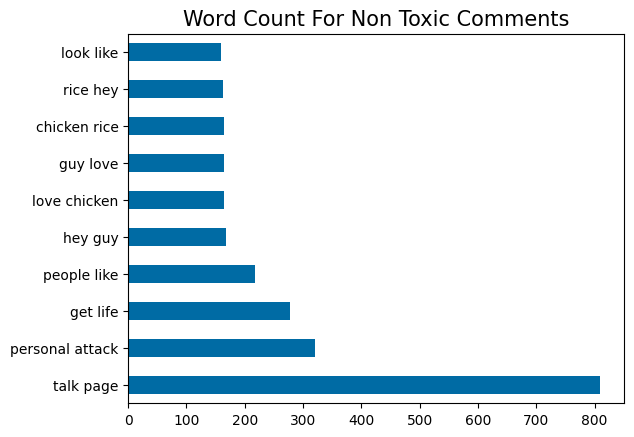

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

cus = CountVectorizer(stop_words=stop_words, ngram_range=(2, 2), max_features=10000)
cus.fit(
    df_train_nontoxic.loc[df_train_nontoxic["non_toxic"] == 0, "cleaned_comment_text"]
)

temp_df = pd.DataFrame(
    cus.transform(
        df_train_nontoxic.loc[
            df_train_nontoxic["non_toxic"] == 1, "cleaned_comment_text"
        ]
    ).todense(),
    columns=cus.get_feature_names_out(),
)

temp_df.sum().sort_values(ascending=False).head(10).plot(kind="barh")

plt.title("word count for non toxic comments".title(), fontsize=15)
plt.show()

In [ ]:
df_train_copy.head()


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  \
0             0        0       0       0              0   
1             0        0       0       0              0   
2             0        0       0       0              0   
3             0        0       0       0              0   
4             0        0       0       0              0   

                                cleaned_comment_text  
0  explanation why the edit make under username h...  
1  aww match this background colour seemingly sti...  
2  hey man really not try edit war just that this...  
3  more cannot make any real suggestions improvem...  
4  you sir hero any chance you remember what page...

In [ ]:
df_train_nontoxic.head()


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  non_toxic  \
0             0        0       0       0              0          0   
1             0        0       0       0              0          0   
2             0        0       0       0              0          0   
3             0        0       0       0              0          0   
4             0        0       0       0              0          0   

   word_count  unique_word_count  upper_case_word_count  stop_word_count  \
0          43                 41                      2               20   
1          17                 17                      1                3   
2          42                 39                      0               21   
3         113                 82                      5               58   
4          13                 13                      0                6   

   punctuation_count  title_word_count  sentence_count  \
0                 10                11               5   
1                 12                 3               4   
2                  6                 2               4   
3                 21                 7               6   
4                  5                 2               3   

   percent_unique_word_count  percent_upper_case_word_count  \
0                  95.348837                       4.651163   
1                 100.000000                       5.882353   
2                  92.857143                       0.000000   
3                  72.566372                       4.424779   
4                 100.000000                       0.000000   

   percent_punctuation_count  \
0                  23.255814   
1                  70.588235   
2                  14.285714   
3                  18.584071   
4                  38.461538   

                                cleaned_comment_text  
0  explanation why the edit make under username h...  
1  aww match this background colour seemingly sti...  
2  hey man really not try edit war just that this...  
3  more cannot make any real suggestions improvem...  
4  you sir hero any chance you remember what page...

# Additional EDA

In [ ]:
# import umap
# import umap.plot

# import matplotlib.pyplot as plt
# %matplotlib inline
# from bokeh.plotting import show, save, output_notebook, output_file
# from bokeh.resources import INLINE
# output_notebook(resources=INLINE)

In [ ]:
# # df_train_sample = df_train_nontoxic.sample(10000)
# df_train_sample = df_train_nontoxic.copy()

# cvec = CountVectorizer(stop_words='english', min_df=5)

# docs = cvec.fit_transform(df_train_sample['cleaned_comment_text'])
# target = df_train_sample['non_toxic']

In [ ]:
# embedding
# embedding = umap.UMAP(n_components=2, metric='hellinger').fit(docs)

In [ ]:
# For interactive plotting use
# f = umap.plot.interactive(embedding, labels=target, point_size=1)
# show(f)
# f = umap.plot.points(embedding, labels=df_train_sample['toxic'], theme='fire')

Word embeddings - 

In [ ]:
# umap = UMAP(random_state=42)
# dr = umap.fit_transform(docs, target)

In [ ]:
# dark_palette = sns.color_palette("dark")
# color = [dark_palette[0] if i==0 else dark_palette[1] for i in target]

In [ ]:
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(111)
# ax.axis('off')

# ax.scatter(x=dr[:,0], y=dr[:,1], s=10, alpha=0.05, c=color)
# ax.set_title('TFIDF Dimension Reduction', loc='left', fontsize=20, fontweight='bold')

# fig.tight_layout()
# plt.show()

# Saving the file

In [ ]:
# To save file
with open("../saved_file/after_eda.pickle", "wb") as f:
    pickle.dump(df_train_nontoxic, f)


In [ ]:
df_train_nontoxic.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  non_toxic  \
0             0        0       0       0              0          0   
1             0        0       0       0              0          0   
2             0        0       0       0              0          0   
3             0        0       0       0              0          0   
4             0        0       0       0              0          0   

   word_count  unique_word_count  upper_case_word_count  stop_word_count  \
0          43                 41                      2               20   
1          17                 17                      1                3   
2          42                 39                      0               21   
3         113                 82                      5               58   
4          13                 13                      0                6   

   punctuation_count  title_word_count  sentence_count  \
0                 10                11               5   
1                 12                 3               4   
2                  6                 2               4   
3                 21                 7               6   
4                  5                 2               3   

   percent_unique_word_count  percent_upper_case_word_count  \
0                  95.348837                       4.651163   
1                 100.000000                       5.882353   
2                  92.857143                       0.000000   
3                  72.566372                       4.424779   
4                 100.000000                       0.000000   

   percent_punctuation_count  \
0                  23.255814   
1                  70.588235   
2                  14.285714   
3                  18.584071   
4                  38.461538   

                                cleaned_comment_text  
0  explanation why the edit make under username h...  
1  aww match this background colour seemingly sti...  
2  hey man really not try edit war just that this...  
3  more cannot make any real suggestions improvem...  
4  you sir hero any chance you remember what page...